In [1]:
'''
Program: Rafail_hw1.ipynb
Author: Rafail Islam
CSC 635, Data Mining
'''
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 1. Load the data in a DataFrame (DF) named tips.
tips = pd.read_csv("tips.csv")

In [3]:
# 2. Find the names of the columns.  
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [4]:
# 3. Rename the columns “time” as “meal” and “size” as “party size”. 
tips.rename(columns = {'time':'meal','size':'party size'}, inplace = True) 

In [5]:
# 4. Use the head function to view parts of the data.
tips.head(5)

,total_bill,tip,sex,smoker,day,meal,party size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
# 5. Retrieve the information in the second and third rows using two different methods
tips.loc[:1]

,total_bill,tip,sex,smoker,day,meal,party size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [7]:
# 5. Retrieve the information in the second and third rows using two different methods
tips.iloc[:2]

,total_bill,tip,sex,smoker,day,meal,party size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [8]:
# 5. Retrieve the information in the second and third rows using two different methods
tips[:2]

,total_bill,tip,sex,smoker,day,meal,party size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [9]:
# 6. Retrieve the information in the first and second columns (i.e., under total_bill and tip). Use the head function to display the first three rows under these two columns.
tips[['total_bill','tip']].head(3)

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50


In [10]:
# 7. Get the information stored in the cell at the intersection of the second row and third column.
tips.iloc[1,[2]]
#tips.loc[1,['sex']]

sex    Male
Name: 1, dtype: object

In [11]:
# 8. Find the number of observations in the dataset.
print(len(tips))
print(tips.index.size)

244
244


In [12]:
# 9. Use the describe function to get basic statistics about the numerical attributes.
tips.describe()


,total_bill,tip,party size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [13]:
# 10. Use the describe function to get basic statistics about all attributes.
tips.describe(include='all')  

,total_bill,tip,sex,smoker,day,meal,party size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [14]:
# 11. How much tip do customers usually give on average? 
tips['tip'].mean()

2.9982786885245902

In [15]:
# 12. et basic statistics about the tip column using the describe function. 
# This helps give an idea about the min, max, median values of tip in addition to other basic statistics.
tips.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc9e4341d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc9e435b400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc9e43419a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc9e435bac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc9e435bdc0>],
 'means': []}

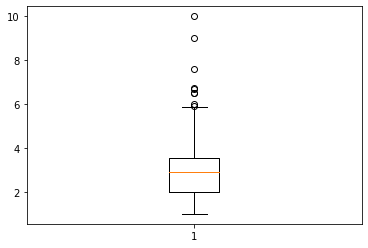

In [16]:
# 13. Draw a boxplot of the tip column. This gives a visual representation of the tips data and shows outliers.
plt.boxplot(tips['tip'])

In [17]:
# 14. Retrieve the rows where the tip amount is >= 6. 
tips[:][tips.tip>=6]

,total_bill,tip,sex,smoker,day,meal,party size
23,39.42,7.58,Male,No,Sat,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3


Text(0.5, 1.0, 'Average tips in USD')

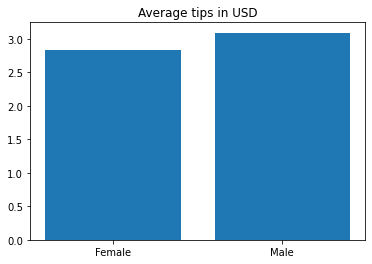

In [18]:
# 15. Do male customers usually give more tips than female customers? 
avg = tips['tip'].groupby(tips['sex']).mean()
plt.bar(avg.index,avg[:])
plt.title("Average tips in USD")

In [19]:
# 16. Create a DF named males that contains the male samples in the tips DF. 
'''Then, call males.sample(10) to draw a random sample of 10 male observations.
'''
males = tips[:][tips.sex=='Male']
males.sample(10)

,total_bill,tip,sex,smoker,day,meal,party size
129,22.82,2.18,Male,No,Thur,Lunch,3
95,40.17,4.73,Male,Yes,Fri,Dinner,4
61,13.81,2.00,Male,Yes,Sat,Dinner,2
12,15.42,1.57,Male,No,Sun,Dinner,2
25,17.81,2.34,Male,No,Sat,Dinner,4
175,32.90,3.11,Male,Yes,Sun,Dinner,2
49,18.04,3.00,Male,No,Sun,Dinner,2
63,18.29,3.76,Male,Yes,Sat,Dinner,4
43,9.68,1.32,Male,No,Sun,Dinner,2
84,15.98,2.03,Male,No,Thur,Lunch,2


In [20]:
# 17. 
females = tips[:][tips.sex=='Female']
females.sample(frac=0.1, replace = True)

,total_bill,tip,sex,smoker,day,meal,party size
213,13.27,2.50,Female,Yes,Sat,Dinner,2
121,13.42,1.68,Female,No,Thur,Lunch,2
146,18.64,1.36,Female,No,Thur,Lunch,3
121,13.42,1.68,Female,No,Thur,Lunch,2
32,15.06,3.00,Female,No,Sat,Dinner,2
133,12.26,2.00,Female,No,Thur,Lunch,2
191,19.81,4.19,Female,Yes,Thur,Lunch,2
191,19.81,4.19,Female,Yes,Thur,Lunch,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2


In [21]:
# 18. Write code to find out the number of male customers and the number of female customers.
print(len(males))
print(len(females))

157
87


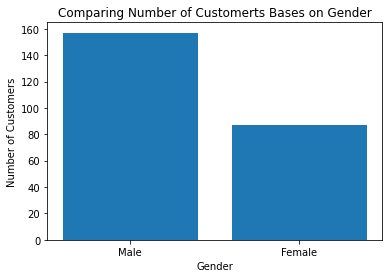

In [22]:
# 19. Create a bar chart comparing the number of males and number of females in the dataset
sex = ['Male', 'Female']
number_customer = [len(males),len(females)]
plt.bar(sex,number_customer)
plt.title("Comparing Number of Customerts Bases on Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.show()

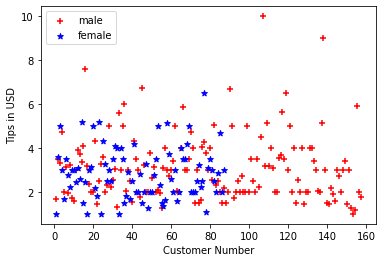

In [23]:
# 20. Draw a scatter plot of the tips given by male customers and a scatter plot of the tips given by female customers.

plt.scatter(range(1,len(males)+1),males['tip'].tolist(),marker='+', color='r',label='male')
plt.scatter(range(1,len(females)+1),females['tip'].tolist(),marker='*', color='b',label='female')
plt.ylabel("Tips in USD")
plt.xlabel("Customer Number")
plt.legend(loc=0)
plt.show()

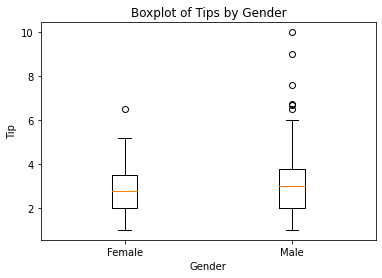

In [24]:
# 21. Draw two box plots to show tips per sex.
plt.boxplot([females.tip,males.tip],labels=['Female','Male'])
plt.xlabel("Gender")
plt.ylabel("Tip")
plt.title('Boxplot of Tips by Gender')
plt.show()

In [25]:
# 22. Apply the describe function on the “day” column of the tips DF and observe the result.
tips.day.describe()

count     244
unique      4
top       Sat
freq       87
Name: day, dtype: object

In [26]:
# 23.
"""Use the groupby function to form groups based on the days of the week and find the number of customers 
that were served every day?
"""
#tips.groupby(tips['day'])['day'].count().plot(kind='bar')
data = tips.groupby(tips['day']).count().reset_index().rename(columns={'tip':'Customer'})
data

,day,total_bill,Customer,sex,smoker,meal,party size
0,Fri,19,19,19,19,19,19
1,Sat,87,87,87,87,87,87
2,Sun,76,76,76,76,76,76
3,Thur,62,62,62,62,62,62


Text(0.5, 1.0, 'Number of Customers Per Day')

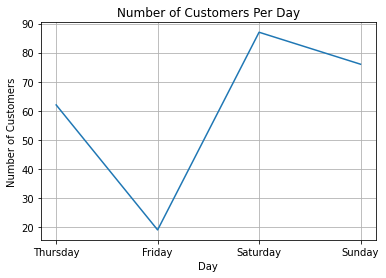

In [27]:
# 24. Draw a line plot that shows number of customers served every day.
#d = data.iloc[:,:2]

day_order = [ "Thur", "Fri", "Sat", "Sun"]
a = data.set_index('day').loc[day_order]
plt.plot(a.index,a['total_bill'])
plt.grid(True)
plt.xticks([0.0,1.0,2.0,3.0],["Thursday",'Friday',"Saturday","Sunday"])
plt.xlabel("Day")
plt.ylabel("Number of Customers")
plt.title("Number of Customers Per Day")

In [28]:
# 25. Use the groupby function to find the average tip per day? Store these averages in variables. 
# These variables will be used next to display the averages in plots. 
avg_tips = tips['tip'].groupby(tips['day']).mean()
avg_tips

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

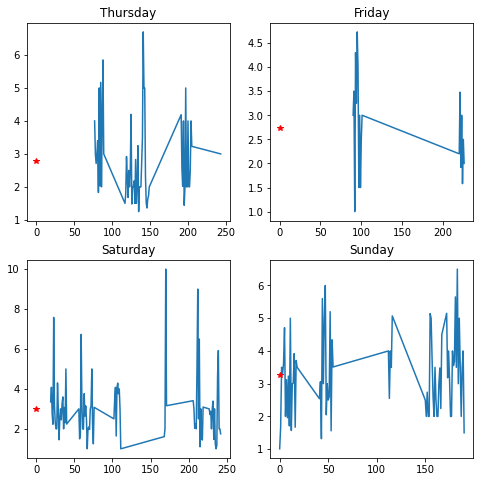

In [29]:
# 26. 
thu = tips[tips['day']=='Thur']
fri = tips[tips['day']=='Fri']
sat = tips[tips['day']=='Sat']
sun = tips[tips['day']=='Sun']

fig = plt.figure(figsize=(8,8))

axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

axes1.plot(thu.index, thu['tip'],'-',0,avg_tips.loc['Thur'],'r*')
axes2.plot(fri.index, fri['tip'],'-',0,avg_tips.loc['Fri'],'r*')
axes3.plot(sat.index, sat['tip'],'-',0,avg_tips.loc['Sat'],'r*')
axes4.plot(sun.index, sun['tip'],'-',0,avg_tips.loc['Sun'],'r*')

axes1.set_title("Thursday")
axes2.set_title("Friday")
axes3.set_title("Saturday")
axes4.set_title("Sunday")
plt.show()

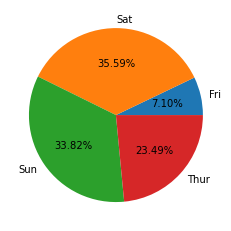

In [30]:
# 27. Draw a pie chart to compare the total tip amounts collected on the different days. 
tt = tips.groupby(tips['day']).sum().reset_index()
plt.pie(tt['tip'],labels=tt['day'],autopct="%0.2f%%")
plt.show()

Part 2: 

In [31]:
# Read dataset 
#https://www.kaggle.com/rishidamarla/data-about-500-us-companies
usCompany = pd.read_csv("us_companies.csv")


In [32]:
usCompany.head(5)

,company_name_id,company_name,url,year_founded,city,state,country,zip_code,full_time_employees,company_type,...,business_model,social_impact,description,description_short,source_count,data_types,example_uses,data_impacts,financial_info,last_updated
0,3-round-stones-inc,"3 Round Stones, Inc.",http://3RoundStones.com,2010.0,Washington,DC,us,20004.0,1-10,Private,...,"Business to Business, Business to Consumer",NaN,3 Round Stones produces a platform for publish...,Our Open Source platform is used by the Fortun...,NaN,NaN,NaN,[],"3 Round Stones is a profitable, self-funded, w...",2014-11-12 14:44:25.969871
1,48-factoring-inc,48 Factoring Inc.,https://www.48factoring.com,2014.0,Philadelphia,PA,us,19087.0,51-200,Private,...,Business to Business,Small Business Owners,The company mission is to provide finance to s...,48 Factoring Inc. is one of the best financial...,11-50,Business,NaN,"[u'Cost efficiency', u'Job growth', u'Revenue ...",NaN,2015-05-18 11:36:39.902880
2,5psolutions,5PSolutions,www.5psolutions.com,2007.0,Fairfax,VA,us,22003.0,1-10,Private,...,"Business to Business, Business to Consumer, Bu...",NaN,"At 5PSolutions, we wish to make all basic info...",5PSolutions are artisans of mobile platforms.,NaN,NaN,NaN,[],NaN,2014-11-12 15:09:35.485949
3,abt-associates,Abt Associates,abtassoc.com,1965.0,Cambridge,MA,us,2138.0,"1,001-5,000",Private,...,NaN,NaN,"Abt Associates is a mission-driven, internatio...","Abt Associates is a mission-driven, global lea...",101+,NaN,NaN,[],Employee-owned company. $552M/year.,2014-09-11 17:23:21.390289
4,accela,Accela,http://www.accela.com,1999.0,San Ramon,CA,us,94583.0,"501-1,000",Private,...,Business to Consumer,"Citizen engagement and participation, Good gov...",Accela powers thousands of services and millio...,Accela improves citizen engagement by making i...,101+,"Health/Healthcare, Housing, Public Safety",NaN,[],NaN,2014-09-16 16:30:49.172802


In [33]:
#%pip install pandas-profiling

In [34]:
from pandas_profiling import ProfileReport

In [35]:
#profile = ProfileReport(usCompany)
#profile.to_file(output_file="Appointments.html")

In [36]:
usCompany.head(5)

,company_name_id,company_name,url,year_founded,city,state,country,zip_code,full_time_employees,company_type,...,business_model,social_impact,description,description_short,source_count,data_types,example_uses,data_impacts,financial_info,last_updated
0,3-round-stones-inc,"3 Round Stones, Inc.",http://3RoundStones.com,2010.0,Washington,DC,us,20004.0,1-10,Private,...,"Business to Business, Business to Consumer",NaN,3 Round Stones produces a platform for publish...,Our Open Source platform is used by the Fortun...,NaN,NaN,NaN,[],"3 Round Stones is a profitable, self-funded, w...",2014-11-12 14:44:25.969871
1,48-factoring-inc,48 Factoring Inc.,https://www.48factoring.com,2014.0,Philadelphia,PA,us,19087.0,51-200,Private,...,Business to Business,Small Business Owners,The company mission is to provide finance to s...,48 Factoring Inc. is one of the best financial...,11-50,Business,NaN,"[u'Cost efficiency', u'Job growth', u'Revenue ...",NaN,2015-05-18 11:36:39.902880
2,5psolutions,5PSolutions,www.5psolutions.com,2007.0,Fairfax,VA,us,22003.0,1-10,Private,...,"Business to Business, Business to Consumer, Bu...",NaN,"At 5PSolutions, we wish to make all basic info...",5PSolutions are artisans of mobile platforms.,NaN,NaN,NaN,[],NaN,2014-11-12 15:09:35.485949
3,abt-associates,Abt Associates,abtassoc.com,1965.0,Cambridge,MA,us,2138.0,"1,001-5,000",Private,...,NaN,NaN,"Abt Associates is a mission-driven, internatio...","Abt Associates is a mission-driven, global lea...",101+,NaN,NaN,[],Employee-owned company. $552M/year.,2014-09-11 17:23:21.390289
4,accela,Accela,http://www.accela.com,1999.0,San Ramon,CA,us,94583.0,"501-1,000",Private,...,Business to Consumer,"Citizen engagement and participation, Good gov...",Accela powers thousands of services and millio...,Accela improves citizen engagement by making i...,101+,"Health/Healthcare, Housing, Public Safety",NaN,[],NaN,2014-09-16 16:30:49.172802


In [37]:
usCompany.isnull().sum()

company_name_id          0
company_name             0
url                      0
year_founded             1
city                    33
state                    0
country                  0
zip_code                37
full_time_employees     29
company_type            16
company_category         3
revenue_source          10
business_model          76
social_impact          513
description              0
description_short        0
source_count           303
data_types             387
example_uses           521
data_impacts             0
financial_info         387
last_updated             0
dtype: int64

In [38]:
# shows year range
usCompany.year_founded.describe()

count     528.000000
mean     1992.700758
std        33.853259
min      1799.000000
25%      1994.000000
50%      2007.000000
75%      2010.000000
max      2015.000000
Name: year_founded, dtype: float64

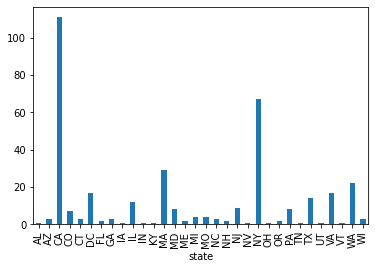

In [39]:
# want to see how many companies have been founded last 15 years year by state
df = usCompany[usCompany['year_founded']>=2000]
df['year_founded'].groupby(df['state']).count().plot(kind='bar')

In [40]:
# shows categories of company 
df['company_category']


0                Data/Technology
1           Finance & Investment
2                Data/Technology
8      Business & Legal Services
9                Data/Technology
                 ...            
523           Geospatial/Mapping
524          Housing/Real Estate
525                   Healthcare
526          Housing/Real Estate
527          Housing/Real Estate
Name: company_category, Length: 361, dtype: object

The graph shows that California has the most newly founded company in last 10 years followed by New York

In [ ]:
# What kind of companies has been founded in last 15 years
df['full_time_employees'].groupby(df['company_category']).count().plot(kind='bar')

In [ ]:
# Want to see which state has highest raise in  Data/Technology  in last 15 years
df[df['company_category'] == 'Data/Technology'].groupby(['state','company_category'])['city'].count().plot(kind='bar')
plt.show()